# Quickstart: Building a GenAI powered Semantic Intelligence with Intugle

This quickstart shows you how to use Intugle’s open-source library to transform fragmented datasets into a connected semantic layer. The semantic layer captures profiling, relationships, and business meaning of your data — making it instantly usable for exploration, search, and data product creation.

**What is Semantic Intelligence?**

A semantic layer is an intelligent knowledge graph of your data. It connects tables, discovers relationships, and enriches them with business glossaries — so both data teams and business users can query with clarity, not complexity.

**Who is this for?**

*   **Data Engineers & Architects** often spend weeks manually profiling, classifying, and stitching together fragmented data assets. With Intugle, they can automate this process end-to-end, uncovering meaningful links and relationships to instantly generate a connected semantic layer.
*   **Data Analysts & Scientists** spend endless hours on data readiness and preparation before they can even start the real analysis. Intugle accelerates this by providing contextual intelligence, automatically generating SQL and reusable data products enriched with relationships and business meaning.
*   **Business Analysts & Decision Makers** are slowed down by constant dependence on technical teams for answers. Intugle removes this bottleneck by enabling natural language queries and semantic search, giving them trusted insights on demand.

**In this notebook, you will learn how to:**

- **Profile and classify data** : Analyze your data sources to understand their structure, data types, and other characteristics.
- **Discover links & relationships among data** : Reveal meaningful connections (PK & FK) across fragmented tables.
- **Generate a business glossary & enable semantic search** : Create business-friendly terms and use them to query data with context.
- **Create a semantic intelligence layer** : Build a unified model (YAML) of your data and relationships.
- **Build unified data products** : Generate reusable SQL queries powered by the semantic layer.


## 1. LLM Configuration

Before running the project, you need to configure a Large Language Model (LLM). This is used for tasks like generating business glossaries and predicting links between tables.

You can configure the LLM by setting the following environment variables:

*   `LLM_PROVIDER`: The LLM provider and model to use (e.g., `openai:gpt-3.5-turbo`). The format follows langchain's format for initializing chat models. Checkout how to specify your model [here](https://python.langchain.com/docs/integrations/chat/)
*   `API_KEY`: Your API key for the LLM provider. The exact name of the variable may vary from provider to provider

Here's an example of how to set these variables in your environment:

```bash
export LLM_PROVIDER="openai:gpt-3.5-turbo"
export OPENAI_API_KEY="your-openai-api-key"
```

Alternatively, you can set them in the notebook like this:


In [ ]:
import os

os.environ["LLM_PROVIDER"] = "openai:gpt-3.5-turbo"
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"  # Replace with your actual key


> Currently the langchain packages for OpenAI, Anthropic and Gemini is installed by default. For additional models, make sure you have the integration packages installed. E.g. you should have langchain-deepseek installed to use a DeepSeek model. You can get these packages here: [LangChain Chat Models](https://python.langchain.com/docs/integrations/chat/)

## 2. Building the Knowledge Base

The `KnowledgeBuilder` is the entry point for building your semantic layer. It takes a dictionary of datasets as input and performs the following steps:

1.  **Data Profiling:** Calculates statistics for each column, such as distinct count, uniqueness, and completeness.
2.  **Datatype Identification:** Identifies the data type of each column (e.g., integer, string, datetime).
3.  **Key Identification:** Identifies potential primary keys.
4.  **Glossary Generation:** Generates a business glossary for each column using an LLM.
5.  **Link Prediction:** Predicts the relationships (foreign keys) between tables.

Let's start by defining the datasets we want to use:

In [ ]:
def generate_config(table_name: str, source: str = "local") -> dict[str, str]:
    """Generate dataset config for local or remote files."""
    path = f"https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/tech_company/{table_name}.csv"
    
    return {
        "path": path,
        "type": "csv"
    }


table_names = [
    "campaign_survey",
    "campaigns",
    "customer_hierarchy",
    "customers",
    "delivery_survey",
    "expense",
    "install_base",
    "inventory",
    "logistics",
    "nps_survey",
    "opportunity",
    "orders",
    "prob_statement_issue",
    "product_feature",
    "product_hierarchy",
    "products",
    "renewals",
    "returns",
    "service_requests",
    "website"
]


datasets = {table: generate_config(table) for table in table_names}

Now, let's use the `KnowledgeBuilder` to build our semantic layer:

> The `domain` parameter helps the LLM generate a more contextual business glossary. It specifies the industry domain that the dataset belongs to (e.g., "Healthcare", "Finance", "E-commerce").

In [13]:
from intugle import KnowledgeBuilder

# Initialize the knowledge builder
kb = KnowledgeBuilder(datasets, domain="Technology Company")

# Run the prediction
kb.build()

/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "schema" in "Source" shadows an attribute in parent "BaseResource"
  warnings.warn(


campaign_survey loaded
campaigns loaded
customer_hierarchy loaded
customers loaded
delivery_survey loaded
expense loaded
install_base loaded
inventory loaded
logistics loaded
nps_survey loaded
opportunity loaded
orders loaded
prob_statement_issue loaded
product_feature loaded
product_hierarchy loaded
products loaded
renewals loaded
returns loaded
service_requests loaded
website loaded


/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3859: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
[*] campaign_survey:   0%|                                | 0/1 [00:00<?, ?it/s]/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/intugle/core/pipeline/key_identification/ki.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={"datatype_l1": "datatype"}, inplace=True)
100%|█████████████████████████████████████████████| 9/9 [00:15<00:00,  1.75s/it]
/Users/prinkan/Downloads/Ampersand/venv

Dataset 'campaign_survey' already processed. Skipping analysis.
Dataset 'campaigns' already processed. Skipping analysis.
Dataset 'customer_hierarchy' already processed. Skipping analysis.
Dataset 'customers' already processed. Skipping analysis.
Dataset 'delivery_survey' already processed. Skipping analysis.
Dataset 'expense' already processed. Skipping analysis.
Dataset 'install_base' already processed. Skipping analysis.
Dataset 'inventory' already processed. Skipping analysis.
Dataset 'logistics' already processed. Skipping analysis.
Dataset 'nps_survey' already processed. Skipping analysis.
Dataset 'opportunity' already processed. Skipping analysis.
Dataset 'orders' already processed. Skipping analysis.
Dataset 'prob_statement_issue' already processed. Skipping analysis.
Dataset 'product_feature' is missing key identification. Running prerequisite analysis...



/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3859: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.93it/s]


Dataset 'product_hierarchy' already processed. Skipping analysis.
Dataset 'products' already processed. Skipping analysis.
Dataset 'renewals' already processed. Skipping analysis.
Dataset 'returns' already processed. Skipping analysis.
Dataset 'service_requests' already processed. Skipping analysis.
Dataset 'website' already processed. Skipping analysis.
LinkPredictor initialized with datasets: ['campaign_survey', 'campaigns', 'customer_hierarchy', 'customers', 'delivery_survey', 'expense', 'install_base', 'inventory', 'logistics', 'nps_survey', 'opportunity', 'orders', 'prob_statement_issue', 'product_feature', 'product_hierarchy', 'products', 'renewals', 'returns', 'service_requests', 'website']

--- Comparing 'campaign_survey' <=> 'campaigns' ---


[*] campaign_survey <==> campaigns Runs:1: 100%|██| 1/1 [00:00<00:00,  1.50it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'customer_hierarchy' ---


[*] campaign_survey <==> customer_hierarchy Runs:1: 100%|█| 1/1 [00:04<00:00,  4


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'customers' ---


[*] campaign_survey <==> customers Runs:1: 100%|██| 1/1 [00:00<00:00,  1.73it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'delivery_survey' ---


[*] campaign_survey <==> delivery_survey Runs:1: 100%|█| 1/1 [00:04<00:00,  4.50


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'expense' ---


[*] campaign_survey <==> expense Runs:1: 100%|████| 1/1 [00:00<00:00,  1.30it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'install_base' ---


[*] campaign_survey <==> install_base Runs:1: 100%|█| 1/1 [00:00<00:00,  1.60it/


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'inventory' ---


[*] campaign_survey <==> inventory Runs:1: 100%|██| 1/1 [00:05<00:00,  5.71s/it]


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'logistics' ---


[*] campaign_survey <==> logistics Runs:1: 100%|██| 1/1 [00:05<00:00,  5.39s/it]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'nps_survey' ---


[*] campaign_survey <==> nps_survey Runs:1: 100%|█| 1/1 [00:02<00:00,  2.59s/it]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'opportunity' ---


[*] campaign_survey <==> opportunity Runs:1: 100%|█| 1/1 [00:06<00:00,  6.77s/it


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'orders' ---


[*] campaign_survey <==> orders Runs:1: 100%|█████| 1/1 [00:00<00:00,  1.55it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'prob_statement_issue' ---


[*] campaign_survey <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:00<00:00, 


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'product_feature' ---


[*] campaign_survey <==> product_feature Runs:1: 100%|█| 1/1 [00:08<00:00,  8.99


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'product_hierarchy' ---


[*] campaign_survey <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:00<00:00,  1.


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'products' ---


[*] campaign_survey <==> products Runs:1: 100%|███| 1/1 [00:01<00:00,  1.11s/it]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'renewals' ---


[*] campaign_survey <==> renewals Runs:1: 100%|███| 1/1 [00:00<00:00,  1.05it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'returns' ---


[*] campaign_survey <==> returns Runs:1: 100%|████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 potential link(s).

--- Comparing 'campaign_survey' <=> 'service_requests' ---


[*] campaign_survey <==> service_requests Runs:1: 100%|█| 1/1 [00:04<00:00,  5.0


No links found for this pair.

--- Comparing 'campaign_survey' <=> 'website' ---


[*] campaign_survey <==> website Runs:1: 100%|████| 1/1 [00:04<00:00,  4.53s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'customer_hierarchy' ---


[*] campaigns <==> customer_hierarchy Runs:1: 100%|█| 1/1 [00:04<00:00,  4.37s/i


No links found for this pair.

--- Comparing 'campaigns' <=> 'customers' ---


[*] campaigns <==> customers Runs:1: 100%|████████| 1/1 [00:00<00:00,  1.17it/s]


Found 1 potential link(s).

--- Comparing 'campaigns' <=> 'delivery_survey' ---


[*] campaigns <==> delivery_survey Runs:1: 100%|██| 1/1 [00:05<00:00,  5.52s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'expense' ---


[*] campaigns <==> expense Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'install_base' ---


[*] campaigns <==> install_base Runs:1: 100%|█████| 1/1 [00:05<00:00,  5.63s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'inventory' ---


[*] campaigns <==> inventory Runs:1: 100%|████████| 1/1 [00:04<00:00,  4.27s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'logistics' ---


[*] campaigns <==> logistics Runs:1: 100%|████████| 1/1 [00:03<00:00,  3.19s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'nps_survey' ---


[*] campaigns <==> nps_survey Runs:1: 100%|███████| 1/1 [00:03<00:00,  3.64s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'opportunity' ---


[*] campaigns <==> opportunity Runs:1: 100%|██████| 1/1 [00:04<00:00,  4.16s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'orders' ---


[*] campaigns <==> orders Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.51it/s]


Found 1 potential link(s).

--- Comparing 'campaigns' <=> 'prob_statement_issue' ---


[*] campaigns <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:05<00:00,  5.28s


No links found for this pair.

--- Comparing 'campaigns' <=> 'product_feature' ---


[*] campaigns <==> product_feature Runs:1: 100%|██| 1/1 [00:04<00:00,  4.30s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'product_hierarchy' ---


[*] campaigns <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:05<00:00,  5.78s/it


No links found for this pair.

--- Comparing 'campaigns' <=> 'products' ---


[*] campaigns <==> products Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.62it/s]


Found 1 potential link(s).

--- Comparing 'campaigns' <=> 'renewals' ---


[*] campaigns <==> renewals Runs:1: 100%|█████████| 1/1 [00:04<00:00,  4.07s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'returns' ---


[*] campaigns <==> returns Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'service_requests' ---


[*] campaigns <==> service_requests Runs:1: 100%|█| 1/1 [00:06<00:00,  6.10s/it]


No links found for this pair.

--- Comparing 'campaigns' <=> 'website' ---


[*] campaigns <==> website Runs:1: 100%|██████████| 1/1 [00:07<00:00,  7.12s/it]


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'customers' ---


[*] customer_hierarchy <==> customers Runs:1: 100%|█| 1/1 [00:00<00:00,  1.64it/


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'delivery_survey' ---


[*] customer_hierarchy <==> delivery_survey Runs:1: 100%|█| 1/1 [00:03<00:00,  3


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'expense' ---


[*] customer_hierarchy <==> expense Runs:1:   0%|         | 0/1 [00:00<?, ?it/s][!] Error while running for customer_hierarchy <=> expense: Reason Traceback (most recent call last):
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/intugle/core/pipeline/link_prediction/lp.py", line 657, in __graph_invoke__
    for event in self.graph.stream(
                 ~~~~~~~~~~~~~~~~~^
        init_data,
        ^^^^^^^^^^
    ...<8 lines>...
        },
        ^^
    ):
    ^
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/langgraph/pregel/main.py", line 2675, in stream
    raise GraphRecursionError(msg)
langgraph.errors.GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

[*] customer_hierarchy <==> expense Runs:1: 100%|█| 1/1 [0

No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'install_base' ---


[*] customer_hierarchy <==> install_base Runs:1: 100%|█| 1/1 [00:04<00:00,  4.95


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'inventory' ---


[*] customer_hierarchy <==> inventory Runs:1: 100%|█| 1/1 [00:01<00:00,  1.36s/i


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'logistics' ---


[*] customer_hierarchy <==> logistics Runs:1: 100%|█| 1/1 [00:01<00:00,  1.38s/i


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'nps_survey' ---


[*] customer_hierarchy <==> nps_survey Runs:1: 100%|█| 1/1 [00:04<00:00,  4.38s/


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'opportunity' ---


[*] customer_hierarchy <==> opportunity Runs:1: 100%|█| 1/1 [00:08<00:00,  8.22s


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'orders' ---


[*] customer_hierarchy <==> orders Runs:1: 100%|██| 1/1 [00:04<00:00,  4.27s/it]


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'prob_statement_issue' ---


[*] customer_hierarchy <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:05<00:0


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'product_feature' ---


[*] customer_hierarchy <==> product_feature Runs:1: 100%|█| 1/1 [00:03<00:00,  3


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'product_hierarchy' ---


[*] customer_hierarchy <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:00<00:00, 


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'products' ---


[*] customer_hierarchy <==> products Runs:1: 100%|█| 1/1 [00:00<00:00,  1.75it/s


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'renewals' ---


[*] customer_hierarchy <==> renewals Runs:1: 100%|█| 1/1 [00:00<00:00,  1.30it/s


Found 1 potential link(s).

--- Comparing 'customer_hierarchy' <=> 'returns' ---


[*] customer_hierarchy <==> returns Runs:1: 100%|█| 1/1 [00:02<00:00,  2.87s/it]


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'service_requests' ---


[*] customer_hierarchy <==> service_requests Runs:1: 100%|█| 1/1 [00:03<00:00,  


No links found for this pair.

--- Comparing 'customer_hierarchy' <=> 'website' ---


[*] customer_hierarchy <==> website Runs:1: 100%|█| 1/1 [00:00<00:00,  1.61it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'delivery_survey' ---


[*] customers <==> delivery_survey Runs:1: 100%|██| 1/1 [00:00<00:00,  1.27it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'expense' ---


[*] customers <==> expense Runs:1: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'install_base' ---


[*] customers <==> install_base Runs:1: 100%|█████| 1/1 [00:00<00:00,  1.36it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'inventory' ---


[*] customers <==> inventory Runs:1: 100%|████████| 1/1 [00:00<00:00,  1.62it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'logistics' ---


[*] customers <==> logistics Runs:1: 100%|████████| 1/1 [00:00<00:00,  1.80it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'nps_survey' ---


[*] customers <==> nps_survey Runs:1: 100%|███████| 1/1 [00:00<00:00,  1.17it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'opportunity' ---


[*] customers <==> opportunity Runs:1: 100%|██████| 1/1 [00:00<00:00,  1.76it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'orders' ---


[*] customers <==> orders Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.60it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'prob_statement_issue' ---


[*] customers <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:00<00:00,  1.43i


Found 1 potential link(s).

--- Comparing 'customers' <=> 'product_feature' ---


[*] customers <==> product_feature Runs:1: 100%|██| 1/1 [00:01<00:00,  1.17s/it]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'product_hierarchy' ---


[*] customers <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:00<00:00,  1.56it/s


Found 1 potential link(s).

--- Comparing 'customers' <=> 'products' ---


[*] customers <==> products Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.63it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'renewals' ---


[*] customers <==> renewals Runs:1: 100%|█████████| 1/1 [00:01<00:00,  1.28s/it]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'returns' ---


[*] customers <==> returns Runs:1: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'service_requests' ---


[*] customers <==> service_requests Runs:1: 100%|█| 1/1 [00:01<00:00,  1.23s/it]


Found 1 potential link(s).

--- Comparing 'customers' <=> 'website' ---


[*] customers <==> website Runs:1: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Found 1 potential link(s).

--- Comparing 'delivery_survey' <=> 'expense' ---


[*] delivery_survey <==> expense Runs:1: 100%|████| 1/1 [00:05<00:00,  5.11s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'install_base' ---


[*] delivery_survey <==> install_base Runs:1: 100%|█| 1/1 [00:00<00:00,  1.27it/


Found 1 potential link(s).

--- Comparing 'delivery_survey' <=> 'inventory' ---


[*] delivery_survey <==> inventory Runs:1: 100%|██| 1/1 [00:05<00:00,  5.94s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'logistics' ---


[*] delivery_survey <==> logistics Runs:1: 100%|██| 1/1 [00:06<00:00,  6.02s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'nps_survey' ---


[*] delivery_survey <==> nps_survey Runs:1: 100%|█| 1/1 [00:05<00:00,  5.37s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'opportunity' ---


[*] delivery_survey <==> opportunity Runs:1: 100%|█| 1/1 [00:05<00:00,  5.01s/it


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'orders' ---


[*] delivery_survey <==> orders Runs:1: 100%|█████| 1/1 [00:04<00:00,  4.58s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'prob_statement_issue' ---


[*] delivery_survey <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:04<00:00, 


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'product_feature' ---


[*] delivery_survey <==> product_feature Runs:1: 100%|█| 1/1 [00:04<00:00,  4.55


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'product_hierarchy' ---


[*] delivery_survey <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:04<00:00,  4.


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'products' ---


[*] delivery_survey <==> products Runs:1: 100%|███| 1/1 [00:00<00:00,  1.81it/s]


Found 1 potential link(s).

--- Comparing 'delivery_survey' <=> 'renewals' ---


[*] delivery_survey <==> renewals Runs:1: 100%|███| 1/1 [00:00<00:00,  1.00it/s]


Found 1 potential link(s).

--- Comparing 'delivery_survey' <=> 'returns' ---


[*] delivery_survey <==> returns Runs:1: 100%|████| 1/1 [00:02<00:00,  2.87s/it]


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'service_requests' ---


[*] delivery_survey <==> service_requests Runs:1: 100%|█| 1/1 [00:05<00:00,  5.5


No links found for this pair.

--- Comparing 'delivery_survey' <=> 'website' ---


[*] delivery_survey <==> website Runs:1: 100%|████| 1/1 [00:00<00:00,  1.72it/s]


Found 1 potential link(s).

--- Comparing 'expense' <=> 'install_base' ---


[*] expense <==> install_base Runs:1: 100%|███████| 1/1 [00:04<00:00,  4.56s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'inventory' ---


[*] expense <==> inventory Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


Found 1 potential link(s).

--- Comparing 'expense' <=> 'logistics' ---


[*] expense <==> logistics Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'nps_survey' ---


[*] expense <==> nps_survey Runs:1:   0%|                 | 0/1 [00:00<?, ?it/s][!] Error while running for expense <=> nps_survey: Reason Traceback (most recent call last):
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/intugle/core/pipeline/link_prediction/lp.py", line 657, in __graph_invoke__
    for event in self.graph.stream(
                 ~~~~~~~~~~~~~~~~~^
        init_data,
        ^^^^^^^^^^
    ...<8 lines>...
        },
        ^^
    ):
    ^
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/langgraph/pregel/main.py", line 2675, in stream
    raise GraphRecursionError(msg)
langgraph.errors.GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

[*] expense <==> nps_survey Runs:1: 100%|█████████| 1/1 [00:09<00:

No links found for this pair.

--- Comparing 'expense' <=> 'opportunity' ---


[*] expense <==> opportunity Runs:1: 100%|████████| 1/1 [00:05<00:00,  5.27s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'orders' ---


[*] expense <==> orders Runs:1: 100%|█████████████| 1/1 [00:04<00:00,  4.17s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'prob_statement_issue' ---


[*] expense <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:03<00:00,  3.85s/i


No links found for this pair.

--- Comparing 'expense' <=> 'product_feature' ---


[*] expense <==> product_feature Runs:1: 100%|████| 1/1 [00:05<00:00,  5.94s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'product_hierarchy' ---


[*] expense <==> product_hierarchy Runs:1: 100%|██| 1/1 [00:06<00:00,  6.57s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'products' ---


[*] expense <==> products Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.43it/s]


Found 1 potential link(s).

--- Comparing 'expense' <=> 'renewals' ---


[*] expense <==> renewals Runs:1: 100%|███████████| 1/1 [00:04<00:00,  4.94s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'returns' ---


[*] expense <==> returns Runs:1: 100%|████████████| 1/1 [00:01<00:00,  1.23s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'service_requests' ---


[*] expense <==> service_requests Runs:1: 100%|███| 1/1 [00:05<00:00,  5.65s/it]


No links found for this pair.

--- Comparing 'expense' <=> 'website' ---


[*] expense <==> website Runs:1: 100%|████████████| 1/1 [00:03<00:00,  3.61s/it]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'inventory' ---


[*] install_base <==> inventory Runs:1: 100%|█████| 1/1 [00:04<00:00,  4.26s/it]


No links found for this pair.

--- Comparing 'install_base' <=> 'logistics' ---


[*] install_base <==> logistics Runs:1: 100%|█████| 1/1 [00:00<00:00,  1.24it/s]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'nps_survey' ---


[*] install_base <==> nps_survey Runs:1:   0%|            | 0/1 [00:00<?, ?it/s][!] Error while running for install_base <=> nps_survey: Reason Traceback (most recent call last):
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/intugle/core/pipeline/link_prediction/lp.py", line 657, in __graph_invoke__
    for event in self.graph.stream(
                 ~~~~~~~~~~~~~~~~~^
        init_data,
        ^^^^^^^^^^
    ...<8 lines>...
        },
        ^^
    ):
    ^
  File "/Users/prinkan/Downloads/Ampersand/venv/lib/python3.13/site-packages/langgraph/pregel/main.py", line 2675, in stream
    raise GraphRecursionError(msg)
langgraph.errors.GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

[*] install_base <==> nps_survey Runs:1: 100%|████| 1/1 [00:0

No links found for this pair.

--- Comparing 'install_base' <=> 'opportunity' ---


[*] install_base <==> opportunity Runs:1: 100%|███| 1/1 [00:04<00:00,  4.03s/it]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'orders' ---


[*] install_base <==> orders Runs:1: 100%|████████| 1/1 [00:00<00:00,  1.23it/s]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'prob_statement_issue' ---


[*] install_base <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:00<00:00,  1.


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'product_feature' ---


[*] install_base <==> product_feature Runs:1: 100%|█| 1/1 [00:05<00:00,  5.58s/i


No links found for this pair.

--- Comparing 'install_base' <=> 'product_hierarchy' ---


[*] install_base <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:01<00:00,  1.90s


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'products' ---


[*] install_base <==> products Runs:1: 100%|██████| 1/1 [00:00<00:00,  1.41it/s]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'renewals' ---


[*] install_base <==> renewals Runs:1: 100%|██████| 1/1 [00:00<00:00,  1.38it/s]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'returns' ---


[*] install_base <==> returns Runs:1: 100%|███████| 1/1 [00:00<00:00,  1.72it/s]


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'service_requests' ---


[*] install_base <==> service_requests Runs:1: 100%|█| 1/1 [00:00<00:00,  1.22it


Found 1 potential link(s).

--- Comparing 'install_base' <=> 'website' ---


[*] install_base <==> website Runs:1: 100%|███████| 1/1 [00:00<00:00,  1.52it/s]


Found 1 potential link(s).

--- Comparing 'inventory' <=> 'logistics' ---


[*] inventory <==> logistics Runs:1: 100%|████████| 1/1 [00:01<00:00,  1.31s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'nps_survey' ---


[*] inventory <==> nps_survey Runs:1: 100%|███████| 1/1 [00:06<00:00,  6.70s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'opportunity' ---


[*] inventory <==> opportunity Runs:1: 100%|██████| 1/1 [00:04<00:00,  4.24s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'orders' ---


[*] inventory <==> orders Runs:1: 100%|███████████| 1/1 [00:04<00:00,  4.36s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'prob_statement_issue' ---


[*] inventory <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:06<00:00,  6.86s


No links found for this pair.

--- Comparing 'inventory' <=> 'product_feature' ---


[*] inventory <==> product_feature Runs:1: 100%|██| 1/1 [00:05<00:00,  5.62s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'product_hierarchy' ---


[*] inventory <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:01<00:00,  1.18s/it


No links found for this pair.

--- Comparing 'inventory' <=> 'products' ---


[*] inventory <==> products Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.03it/s]


Found 1 potential link(s).

--- Comparing 'inventory' <=> 'renewals' ---


[*] inventory <==> renewals Runs:1: 100%|█████████| 1/1 [00:04<00:00,  4.63s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'returns' ---


[*] inventory <==> returns Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'service_requests' ---


[*] inventory <==> service_requests Runs:1: 100%|█| 1/1 [00:07<00:00,  7.78s/it]


No links found for this pair.

--- Comparing 'inventory' <=> 'website' ---


[*] inventory <==> website Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'nps_survey' ---


[*] logistics <==> nps_survey Runs:1: 100%|███████| 1/1 [00:06<00:00,  6.67s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'opportunity' ---


[*] logistics <==> opportunity Runs:1: 100%|██████| 1/1 [00:05<00:00,  5.96s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'orders' ---


[*] logistics <==> orders Runs:1: 100%|███████████| 1/1 [00:04<00:00,  4.47s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'prob_statement_issue' ---


[*] logistics <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:04<00:00,  4.95s


No links found for this pair.

--- Comparing 'logistics' <=> 'product_feature' ---


[*] logistics <==> product_feature Runs:1: 100%|██| 1/1 [00:04<00:00,  4.96s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'product_hierarchy' ---


[*] logistics <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:02<00:00,  2.58s/it


No links found for this pair.

--- Comparing 'logistics' <=> 'products' ---


[*] logistics <==> products Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.15it/s]


Found 1 potential link(s).

--- Comparing 'logistics' <=> 'renewals' ---


[*] logistics <==> renewals Runs:1: 100%|█████████| 1/1 [00:04<00:00,  4.45s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'returns' ---


[*] logistics <==> returns Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'service_requests' ---


[*] logistics <==> service_requests Runs:1: 100%|█| 1/1 [00:40<00:00, 40.77s/it]


No links found for this pair.

--- Comparing 'logistics' <=> 'website' ---


[*] logistics <==> website Runs:1: 100%|██████████| 1/1 [00:05<00:00,  5.62s/it]


No links found for this pair.

--- Comparing 'nps_survey' <=> 'opportunity' ---


[*] nps_survey <==> opportunity Runs:1: 100%|█████| 1/1 [00:05<00:00,  5.79s/it]


No links found for this pair.

--- Comparing 'nps_survey' <=> 'orders' ---


[*] nps_survey <==> orders Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]


No links found for this pair.

--- Comparing 'nps_survey' <=> 'prob_statement_issue' ---


[*] nps_survey <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:03<00:00,  3.62


No links found for this pair.

--- Comparing 'nps_survey' <=> 'product_feature' ---


[*] nps_survey <==> product_feature Runs:1: 100%|█| 1/1 [00:05<00:00,  5.98s/it]


No links found for this pair.

--- Comparing 'nps_survey' <=> 'product_hierarchy' ---


[*] nps_survey <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:06<00:00,  6.17s/i


No links found for this pair.

--- Comparing 'nps_survey' <=> 'products' ---


[*] nps_survey <==> products Runs:1: 100%|████████| 1/1 [00:00<00:00,  1.84it/s]


Found 1 potential link(s).

--- Comparing 'nps_survey' <=> 'renewals' ---


[*] nps_survey <==> renewals Runs:1: 100%|████████| 1/1 [00:04<00:00,  4.79s/it]


No links found for this pair.

--- Comparing 'nps_survey' <=> 'returns' ---


[*] nps_survey <==> returns Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.65it/s]


Found 1 potential link(s).

--- Comparing 'nps_survey' <=> 'service_requests' ---


[*] nps_survey <==> service_requests Runs:1: 100%|█| 1/1 [00:02<00:00,  2.63s/it


No links found for this pair.

--- Comparing 'nps_survey' <=> 'website' ---


[*] nps_survey <==> website Runs:1: 100%|█████████| 1/1 [00:00<00:00,  1.22it/s]


Found 1 potential link(s).

--- Comparing 'opportunity' <=> 'orders' ---


[*] opportunity <==> orders Runs:1: 100%|█████████| 1/1 [00:04<00:00,  4.14s/it]


No links found for this pair.

--- Comparing 'opportunity' <=> 'prob_statement_issue' ---


[*] opportunity <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:09<00:00,  9.4


No links found for this pair.

--- Comparing 'opportunity' <=> 'product_feature' ---


[*] opportunity <==> product_feature Runs:1: 100%|█| 1/1 [00:08<00:00,  8.01s/it


No links found for this pair.

--- Comparing 'opportunity' <=> 'product_hierarchy' ---


[*] opportunity <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:02<00:00,  2.89s/


No links found for this pair.

--- Comparing 'opportunity' <=> 'products' ---


[*] opportunity <==> products Runs:1: 100%|███████| 1/1 [00:00<00:00,  1.80it/s]


Found 1 potential link(s).

--- Comparing 'opportunity' <=> 'renewals' ---


[*] opportunity <==> renewals Runs:1: 100%|███████| 1/1 [00:05<00:00,  5.36s/it]


No links found for this pair.

--- Comparing 'opportunity' <=> 'returns' ---


[*] opportunity <==> returns Runs:1: 100%|████████| 1/1 [00:03<00:00,  3.29s/it]


No links found for this pair.

--- Comparing 'opportunity' <=> 'service_requests' ---


[*] opportunity <==> service_requests Runs:1: 100%|█| 1/1 [00:06<00:00,  6.95s/i


No links found for this pair.

--- Comparing 'opportunity' <=> 'website' ---


[*] opportunity <==> website Runs:1: 100%|████████| 1/1 [00:09<00:00,  9.83s/it]


No links found for this pair.

--- Comparing 'orders' <=> 'prob_statement_issue' ---


[*] orders <==> prob_statement_issue Runs:1: 100%|█| 1/1 [00:00<00:00,  1.66it/s


Found 1 potential link(s).

--- Comparing 'orders' <=> 'product_feature' ---


[*] orders <==> product_feature Runs:1: 100%|█████| 1/1 [00:07<00:00,  7.62s/it]


No links found for this pair.

--- Comparing 'orders' <=> 'product_hierarchy' ---


[*] orders <==> product_hierarchy Runs:1: 100%|███| 1/1 [00:01<00:00,  1.50s/it]


Found 1 potential link(s).

--- Comparing 'orders' <=> 'products' ---


[*] orders <==> products Runs:1: 100%|████████████| 1/1 [00:00<00:00,  1.15it/s]


Found 1 potential link(s).

--- Comparing 'orders' <=> 'renewals' ---


[*] orders <==> renewals Runs:1: 100%|████████████| 1/1 [00:00<00:00,  1.60it/s]


Found 1 potential link(s).

--- Comparing 'orders' <=> 'returns' ---


[*] orders <==> returns Runs:1: 100%|█████████████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 potential link(s).

--- Comparing 'orders' <=> 'service_requests' ---


[*] orders <==> service_requests Runs:1: 100%|████| 1/1 [00:00<00:00,  1.26it/s]


Found 1 potential link(s).

--- Comparing 'orders' <=> 'website' ---


[*] orders <==> website Runs:1: 100%|█████████████| 1/1 [00:04<00:00,  4.80s/it]


No links found for this pair.

--- Comparing 'prob_statement_issue' <=> 'product_feature' ---


[*] prob_statement_issue <==> product_feature Runs:1: 100%|█| 1/1 [00:01<00:00, 


No links found for this pair.

--- Comparing 'prob_statement_issue' <=> 'product_hierarchy' ---


[*] prob_statement_issue <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:01<00:00


No links found for this pair.

--- Comparing 'prob_statement_issue' <=> 'products' ---


[*] prob_statement_issue <==> products Runs:1: 100%|█| 1/1 [00:00<00:00,  1.40it


Found 1 potential link(s).

--- Comparing 'prob_statement_issue' <=> 'renewals' ---


[*] prob_statement_issue <==> renewals Runs:1: 100%|█| 1/1 [00:04<00:00,  4.85s/


No links found for this pair.

--- Comparing 'prob_statement_issue' <=> 'returns' ---


[*] prob_statement_issue <==> returns Runs:1: 100%|█| 1/1 [00:00<00:00,  1.54it/


Found 1 potential link(s).

--- Comparing 'prob_statement_issue' <=> 'service_requests' ---


[*] prob_statement_issue <==> service_requests Runs:1: 100%|█| 1/1 [00:00<00:00,


Found 1 potential link(s).

--- Comparing 'prob_statement_issue' <=> 'website' ---


[*] prob_statement_issue <==> website Runs:1: 100%|█| 1/1 [00:00<00:00,  1.20it/


Found 1 potential link(s).

--- Comparing 'product_feature' <=> 'product_hierarchy' ---


[*] product_feature <==> product_hierarchy Runs:1: 100%|█| 1/1 [00:01<00:00,  1.


No links found for this pair.

--- Comparing 'product_feature' <=> 'products' ---


[*] product_feature <==> products Runs:1: 100%|███| 1/1 [00:00<00:00,  1.61it/s]


Found 1 potential link(s).

--- Comparing 'product_feature' <=> 'renewals' ---


[*] product_feature <==> renewals Runs:1: 100%|███| 1/1 [00:06<00:00,  6.57s/it]


No links found for this pair.

--- Comparing 'product_feature' <=> 'returns' ---


[*] product_feature <==> returns Runs:1: 100%|████| 1/1 [00:09<00:00,  9.77s/it]


No links found for this pair.

--- Comparing 'product_feature' <=> 'service_requests' ---


[*] product_feature <==> service_requests Runs:1: 100%|█| 1/1 [00:07<00:00,  7.2


No links found for this pair.

--- Comparing 'product_feature' <=> 'website' ---


[*] product_feature <==> website Runs:1: 100%|████| 1/1 [00:06<00:00,  6.62s/it]


No links found for this pair.

--- Comparing 'product_hierarchy' <=> 'products' ---


[*] product_hierarchy <==> products Runs:1: 100%|█| 1/1 [00:00<00:00,  1.17it/s]


Found 1 potential link(s).

--- Comparing 'product_hierarchy' <=> 'renewals' ---


[*] product_hierarchy <==> renewals Runs:1: 100%|█| 1/1 [00:05<00:00,  5.61s/it]


No links found for this pair.

--- Comparing 'product_hierarchy' <=> 'returns' ---


[*] product_hierarchy <==> returns Runs:1: 100%|██| 1/1 [00:01<00:00,  1.90s/it]


No links found for this pair.

--- Comparing 'product_hierarchy' <=> 'service_requests' ---


[*] product_hierarchy <==> service_requests Runs:1: 100%|█| 1/1 [00:06<00:00,  6


No links found for this pair.

--- Comparing 'product_hierarchy' <=> 'website' ---


[*] product_hierarchy <==> website Runs:1: 100%|██| 1/1 [00:01<00:00,  1.02s/it]


Found 1 potential link(s).

--- Comparing 'products' <=> 'renewals' ---


[*] products <==> renewals Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


Found 1 potential link(s).

--- Comparing 'products' <=> 'returns' ---


[*] products <==> returns Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.43it/s]


Found 1 potential link(s).

--- Comparing 'products' <=> 'service_requests' ---


[*] products <==> service_requests Runs:1: 100%|██| 1/1 [00:00<00:00,  1.14it/s]


Found 1 potential link(s).

--- Comparing 'products' <=> 'website' ---


[*] products <==> website Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.29it/s]


Found 1 potential link(s).

--- Comparing 'renewals' <=> 'returns' ---


[*] renewals <==> returns Runs:1: 100%|███████████| 1/1 [00:00<00:00,  1.48it/s]


Found 1 potential link(s).

--- Comparing 'renewals' <=> 'service_requests' ---


[*] renewals <==> service_requests Runs:1: 100%|██| 1/1 [00:00<00:00,  1.50it/s]


Found 1 potential link(s).

--- Comparing 'renewals' <=> 'website' ---


[*] renewals <==> website Runs:1: 100%|███████████| 1/1 [00:01<00:00,  1.14s/it]


Found 1 potential link(s).

--- Comparing 'returns' <=> 'service_requests' ---


[*] returns <==> service_requests Runs:1: 100%|███| 1/1 [00:00<00:00,  1.20it/s]


Found 1 potential link(s).

--- Comparing 'returns' <=> 'website' ---


[*] returns <==> website Runs:1: 100%|████████████| 1/1 [00:00<00:00,  1.73it/s]


Found 1 potential link(s).

--- Comparing 'service_requests' <=> 'website' ---


[*] service_requests <==> website Runs:1: 100%|███| 1/1 [00:00<00:00,  1.41it/s]

Found 1 potential link(s).


## 3. Accessing Enriched Metadata

Now that the knowledge base is built, you can easily access the enriched metadata for each dataset.

### Accessing a Dataset

You can access a specific dataset by its name from the `kb.datasets` dictionary:

In [ ]:
products_dataset = kb.datasets['products']
products_dataset.profiling_df


,column_name,business_name,table_name,null_count,count,distinct_count,uniqueness,completeness,sample_data,dtype_sample,ts,datatype_l1,datatype_l2,business_glossary,business_tags
0,Product ID,product_id,products,0,1000,1000,1.000,1.0,"[PROD-11229, PROD-11563, PROD-11068, PROD-1134...","[PROD-11010, PROD-11068, PROD-11079, PROD-1112...",0.006800,alphanumeric,L2OutputTypes.dimension,Identifier for each unique product in the comp...,"[Product Identifier, Inventory Tracking, Sales..."
1,Product Name,product_name,products,0,1000,5,0.005,1.0,"[NetConnect, DataSphere, Insight360, CloudEdge...","[CloudEdge, CoreAnalytics, NetConnect, Insight...",0.004061,alphanumeric,L2OutputTypes.dimension,Identifies the name of the products offered by...,"[Product Offering, Service Name, Solution Iden..."
2,Product Category,product_category,products,0,1000,5,0.005,1.0,"[IoT, Networking, Analytics, Cloud Platform, S...","[IoT, Networking, Cloud Platform, Security, An...",0.003233,close_ended_text,L2OutputTypes.dimension,Categorization of different types of products ...,"[Technology Solutions, Cybersecurity, Data Ana..."
3,Product Status,product_status,products,0,1000,5,0.005,1.0,"[Retired, GA (General Availability), Pilot, Ac...","[In Development, Retired, Pilot, GA (General A...",0.003625,close_ended_text,L2OutputTypes.dimension,Indicates the current status of a product with...,"[Product Lifecycle Stage, Development Status, ..."
4,R&D Initiation Date,r_d_initiation_date,products,0,1000,777,0.777,1.0,"[2021-08-17, 2023-05-31, 2023-04-26, 2024-06-2...","[2025-05-19, 2025-04-21, 2022-05-21, 2024-04-0...",0.003703,date & time,L2OutputTypes.dimension,Date when the research and development process...,"[Research and Development Schedule, Innovation..."
5,R&D Stage,r_d_stage,products,0,1000,5,0.005,1.0,"[Pre-Launch, Enhancement, Prototype, Testing, ...","[Enhancement, Concept, Pre-Launch, Testing, Pr...",0.002018,close_ended_text,L2OutputTypes.dimension,Describes the stage of research and developmen...,"[Product Development Phase, Innovation Stage, ..."
6,Launch Status,launch_status,products,0,1000,5,0.005,1.0,"[Not Launched, Planned, Cancelled, In Pipeline...","[Launched, In Pipeline, Not Launched, Cancelle...",0.002018,close_ended_text,L2OutputTypes.dimension,Indicates the current status of a product in t...,"[Product Launch Status, Development Stage, Pip..."
7,Launch Date,launch_date,products,0,1000,659,0.659,1.0,"[2023-03-28, 2024-04-20, 2023-06-27, 2024-09-2...","[2023-12-14, 2023-07-15, 2025-07-22, 2024-11-3...",0.002480,date & time,L2OutputTypes.dimension,Records the date when a product was launched.,"[Product Launch Date, Market Entry, Product Li..."
8,PM Name,pm_name,products,0,1000,994,0.994,1.0,"[Dustin Allen, Ashley Miles, Alexandra Thomas,...","[William Rodgers, Dawn Harris MD, Shannon Osbo...",0.002735,close_ended_text,L2OutputTypes.dimension,Manages the project or product associated with...,"[Project Manager, Team Lead, Contact Person]"
9,Product Cost ($),product_cost,products,0,1000,998,0.998,1.0,"[187820, 425461, 344462, 349802, 322868, 46378...","[222364, 571000, 335185, 558107, 598668, 26134...",0.002293,integer,L2OutputTypes.measure,Cost associated with each product in the compa...,"[Cost Analysis, Financial Reporting, Pricing S..."


The profiling results can be accessed through the `profiling_df` property of the `DataSet` object. It's a pandas DataFrame that you can easily explore. 
> The business glossary is also available in the `profiling_df`:


### Visualizing Relationships

The `KnowledgeBuilder` automatically discovers the relationships between your tables. You can access the predicted links as a list of `PredictedLink` objects:


In [15]:
kb.links

[PredictedLink(from_dataset='campaign_survey', from_column='Camp ID', to_dataset='campaigns', to_column='Campaign ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='customers', to_column='C_ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='expense', to_column='Contact ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Camp ID', to_dataset='install_base', to_column='Order ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='logistics', to_column='Cust_ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='nps_survey', to_column='Customer_ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='orders', to_column='Party ID'),
 PredictedLink(from_dataset='campaign_survey', from_column='Participant Name', to_dataset='prob_statement_issue', to_column='Issue ID'

You can also visualize these relationships as a graph:


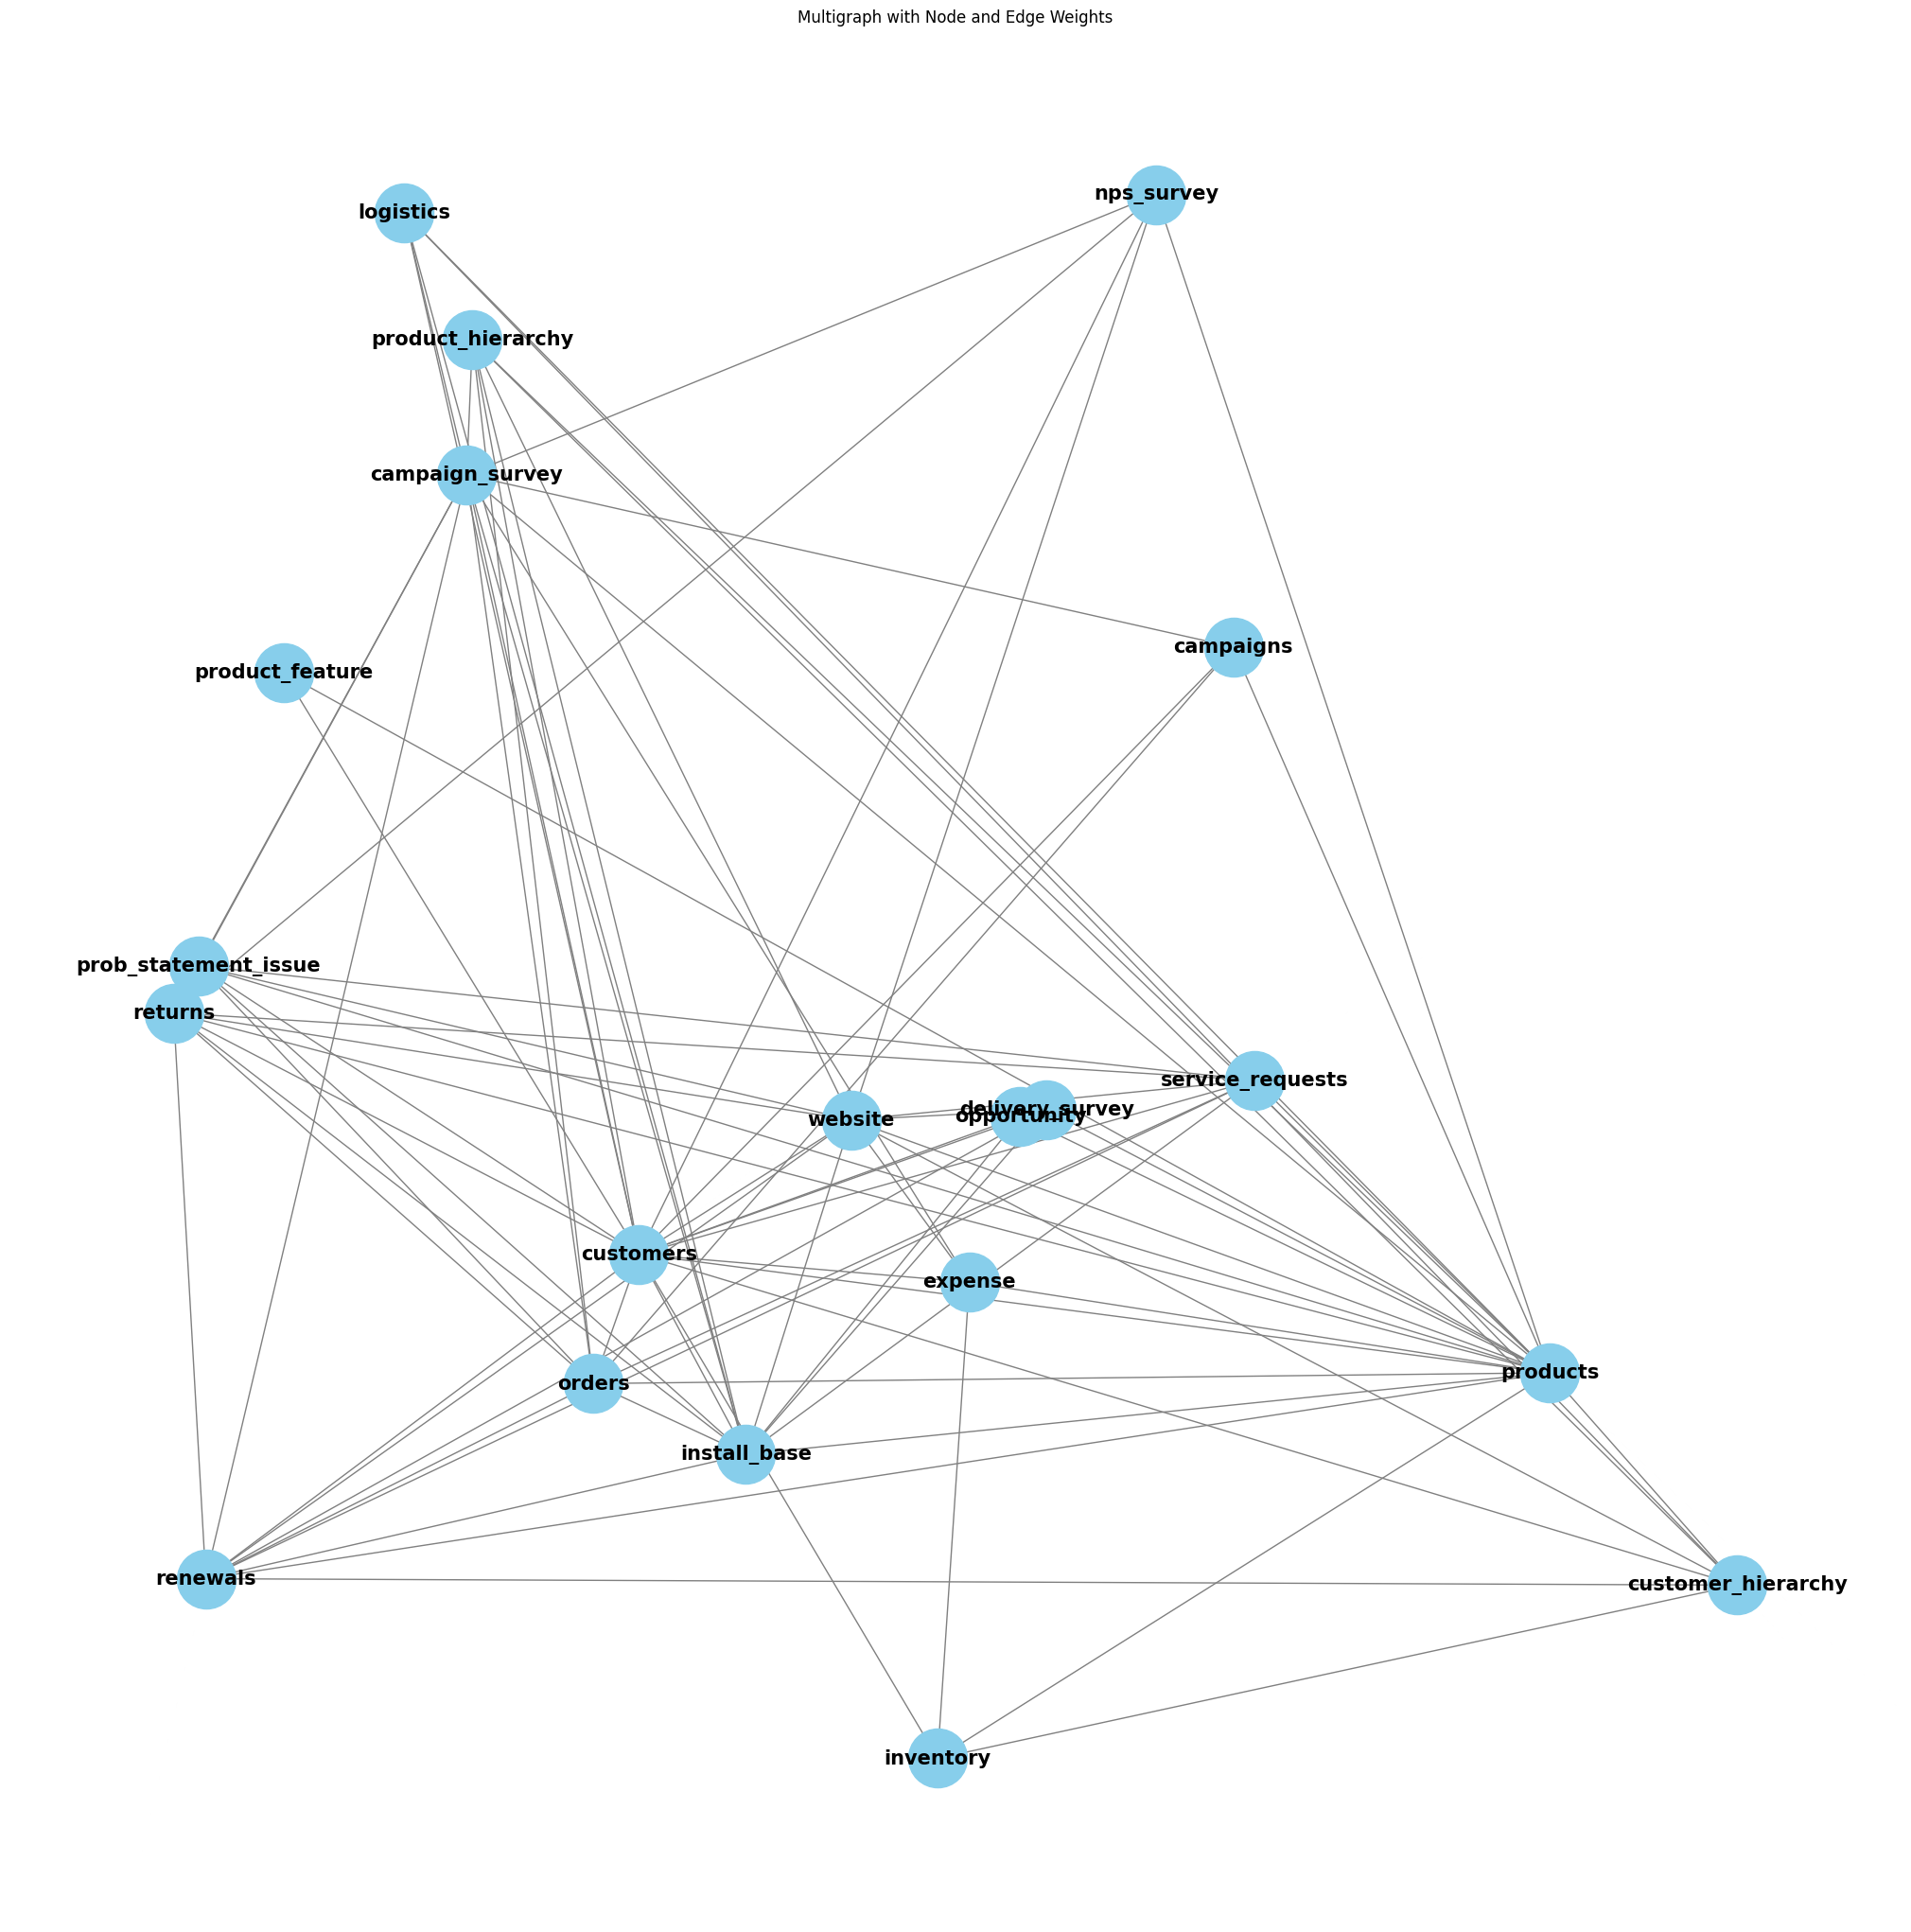

In [16]:
kb.visualize()


## 4. The Semantic Layer

The KnowledgeBuilder results are used to generate YAML files which are saved automatically. These files defines the semantic layer, including the models (tables) and their relationships. 

By default, these files are saved in the current working directory. You can configure this path by setting the `PROJECT_BASE` environment variable.


## 5. Data Product Creation

The semantic layer serves as a foundation for the DataProductBuilder, which streamlines the creation of reusable data products. This allows you
to encapsulate business logic and create standardized, trustworthy data assets that can be easily shared and reused across different teams and 
applications.

Let's define the model for the data product we want to build:

In [ ]:
etl = {
  "name": "top_patients_by_claim_count",
  "fields": [
    {
      "id": "patients.first",
      "name": "first_name",
    },
    {
      "id": "patients.last",
      "name": "last_name",
    },
    {
      "id": "claims.id",
      "name": "number_of_claims",
      "category": "measure",
      "measure_func": "count"
    }
  ],
  "filter": {
    "sort_by": [
      {
        "id": "claims.id",
        "alias": "number_of_claims",
        "direction": "desc"
      }
    ],
    "limit": 10
  }
}

Now, let's use the `DataProductBuilder` to generate the data product:

In [ ]:
from intugle.dp_builder import DataProductBuilder

# Create a DataProductBuilder
dp_builder = DataProductBuilder()

# Generate the data product
data_product = dp_builder.build(etl)

data_product.to_df()


The `generate_product` function returns a `DataSet` object. You can also view the generated SQL query used for creating the data product:


In [ ]:
# The generated SQL query
data_product.sql_query



## Conclusion

You've learned how to:

*   Configure your LLM provider.
*   Build a knowledge base using the `KnowledgeBuilder`.
*   Access enriched metadata, business glossaries and visualize the relationships between your tables.
*   Generate data products from the semantic layer using the `DataProductBuilder`.

This is just a starting point. This project has many other features to explore. We encourage you to try it with your own data and see how it can help you build a powerful semantic layer.
